In [1]:
import pandas as pd
from datetime import datetime

In [2]:
stock_price_df = pd.read_csv('HistoricalData_META.csv', parse_dates=['Date'])
stock_price_df.sort_values(by='Date', inplace=True)
oldest_date = stock_price_df['Date'].min()
newest_date = stock_price_df['Date'].max()
stock_price_df

,Date,Close/Last,Volume,Open,High,Low
2521,2013-12-23,57.77,98124560,55.50,58.32,55.45
2520,2013-12-24,57.96,46617750,58.27,58.58,56.91
2519,2013-12-26,57.73,55024630,58.32,58.38,57.37
2518,2013-12-27,55.44,60251230,57.48,57.68,55.25
2517,2013-12-30,53.71,68195850,54.93,55.18,53.43
...,...,...,...,...,...,...
4,2023-12-22,353.39,11772780,355.58,357.20,351.22
3,2023-12-26,354.83,9898614,354.99,356.98,353.45
2,2023-12-27,357.83,13207930,356.07,359.00,355.31
1,2023-12-28,358.32,11798810,359.70,361.90,357.81


In [3]:
stock_price_df['Days'] = (stock_price_df['Date'] - stock_price_df['Date'].shift()).dt.days
stock_price_df['Delta Close/Last'] = stock_price_df['Close/Last'] - stock_price_df['Close/Last'].shift()
stock_price_df['Daily Change Close/Last'] = stock_price_df['Delta Close/Last'] / stock_price_df['Days']
stock_price_df['% Change Close/Last'] = stock_price_df['Daily Change Close/Last'] / stock_price_df['Close/Last']
stock_price_df

,Date,Close/Last,Volume,Open,High,Low,Days,Delta Close/Last,Daily Change Close/Last,% Change Close/Last
2521,2013-12-23,57.77,98124560,55.50,58.32,55.45,NaN,NaN,NaN,NaN
2520,2013-12-24,57.96,46617750,58.27,58.58,56.91,1.0,0.19,0.190000,0.003278
2519,2013-12-26,57.73,55024630,58.32,58.38,57.37,2.0,-0.23,-0.115000,-0.001992
2518,2013-12-27,55.44,60251230,57.48,57.68,55.25,1.0,-2.29,-2.290000,-0.041306
2517,2013-12-30,53.71,68195850,54.93,55.18,53.43,3.0,-1.73,-0.576667,-0.010737
...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,353.39,11772780,355.58,357.20,351.22,1.0,-0.70,-0.700000,-0.001981
3,2023-12-26,354.83,9898614,354.99,356.98,353.45,4.0,1.44,0.360000,0.001015
2,2023-12-27,357.83,13207930,356.07,359.00,355.31,1.0,3.00,3.000000,0.008384
1,2023-12-28,358.32,11798810,359.70,361.90,357.81,1.0,0.49,0.490000,0.001367


In [4]:
df = stock_price_df.sort_values(by='% Change Close/Last')
df[['Date', 'Close/Last', 'Daily Change Close/Last', '% Change Close/Last']].to_csv('META_close_change.csv')

In [5]:
highlight_df = stock_price_df[(stock_price_df['% Change Close/Last'] < -0.1) | (stock_price_df['% Change Close/Last'] > 0.1)]

C:\Users\Matthew\AppData\Local\Temp\ipykernel_15080\3448744326.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = highlight_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot('Date', 'Close/Last', kind='scatter', color='r', s=50)


<Axes: >

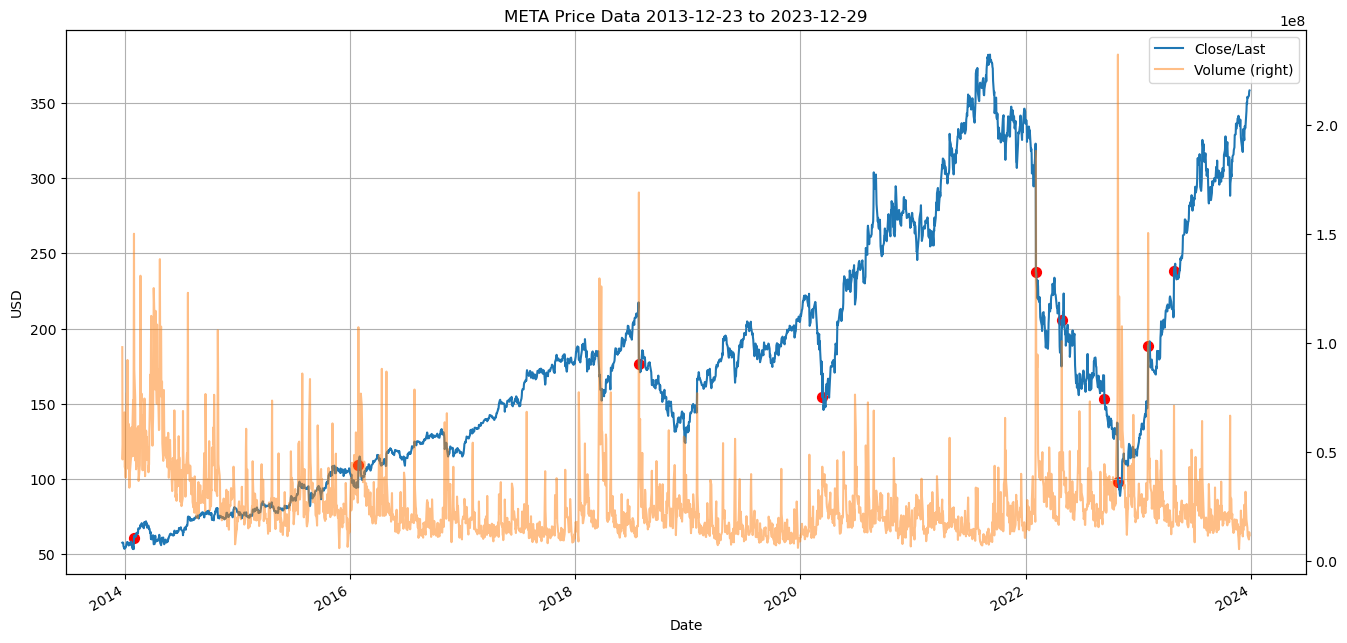

In [6]:
figsize = (16, 8)
start = oldest_date # datetime(2022, 1, 1)
end = newest_date

ax = highlight_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot('Date', 'Close/Last', kind='scatter', color='r', s=50)
stock_price_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot(
    'Date', 'Close/Last', figsize=figsize, title=f'META Price Data {start.date()} to {end.date()}', ylabel='USD', ax=ax, grid=True)
stock_price_df[(stock_price_df['Date'] >= start) & (stock_price_df['Date'] < end)].plot('Date', 'Volume', ax=ax, secondary_y=True, alpha=0.5)